In [1]:
input_file = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/data_imbalance.txt'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [4]:
data = pd.read_csv(input_file, header=None).to_numpy()
data = np.loadtxt(input_file, delimiter=',')

In [5]:
data[:3]

array([[5.66, 6.77, 1.  ],
       [4.4 , 5.05, 0.  ],
       [3.52, 4.73, 1.  ]])

In [6]:
# 데이터편량: 보통 10배 이상 차이가 나면
x = data[:,:-1]
y = data[:, -1]
class_0 = np.array(x[y==0])
class_1 = np.array(x[y==1])

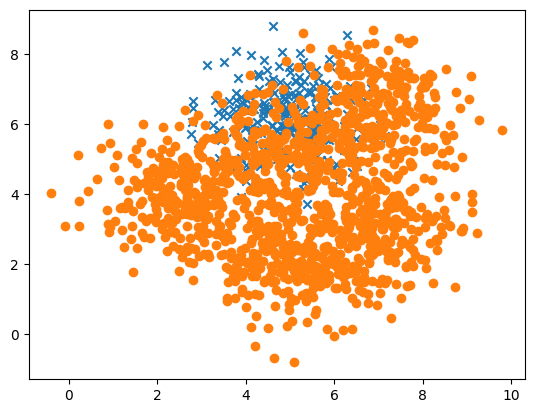

In [7]:
# 입력데이터의 2차원 시각화
plt.scatter(class_0[:,0], class_0[:,1], marker='x')
plt.scatter(class_1[:,0], class_1[:,1], marker='o')
plt.show()

In [8]:
# 훈련세트와 테스트세트 분류
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

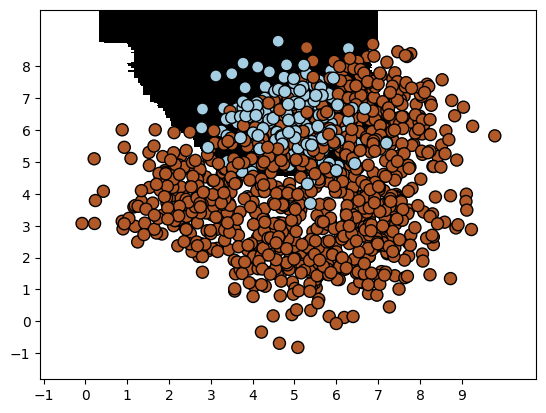

In [9]:
params = {
    'n_estimators' : 100, 'max_depth' : 4, 'random_state' : 0, 'class_weight' : 'balanced'
}
classifier = ExtraTreesClassifier(**params)
classifier.fit(x_train, y_train)
visualize_classifier(classifier, x_train, y_train)

In [10]:
classifier.score(x_test,y_test)

0.79

In [11]:
# 분류기의 성능 계산
print(classification_report(y_train, classifier.predict(x_train), target_names=['class_0', 'class_1']))
print(classification_report(y_test, classifier.predict(x_test), target_names=['class_0', 'class_1']))

              precision    recall  f1-score   support

     class_0       0.46      0.92      0.61       206
     class_1       0.98      0.77      0.86       994

    accuracy                           0.80      1200
   macro avg       0.72      0.85      0.74      1200
weighted avg       0.89      0.80      0.82      1200

              precision    recall  f1-score   support

     class_0       0.40      0.89      0.55        44
     class_1       0.98      0.77      0.86       256

    accuracy                           0.79       300
   macro avg       0.69      0.83      0.71       300
weighted avg       0.89      0.79      0.82       300



In [12]:
# 언더샘플링
# 다수 클래스의 무작위를 제거해서 균형을 맞춤
len(class_0), len(class_1)

(250, 1250)

In [13]:
# 훈련세트와 테스트세트 분류
def classReport(X,y):
  # 입력데이터의 2차원 시각화
  class_0 = np.array(X[y==0])
  class_1 = np.array(X[y==1])
  plt.scatter(class_0[:,0],class_0[:,1],marker='x')
  plt.scatter(class_1[:,0],class_1[:,1],marker='o',alpha=0.3)
  plt.show()

  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  params = {
      'n_estimators' : 100, 'max_depth' : 4, 'random_state' : 0,
      'class_weight':'balanced'
  }
  classifier =  ExtraTreesClassifier(**params)
  classifier.fit(x_train, y_train)
  visualize_classifier(classifier,x_train,y_train)
  # 분류기의 성능 계산
  print(classification_report(y_train, classifier.predict(x_train), target_names=['class_0','class_1']))
  print(classification_report(y_test, classifier.predict(x_test), target_names=['class_0','class_1']))

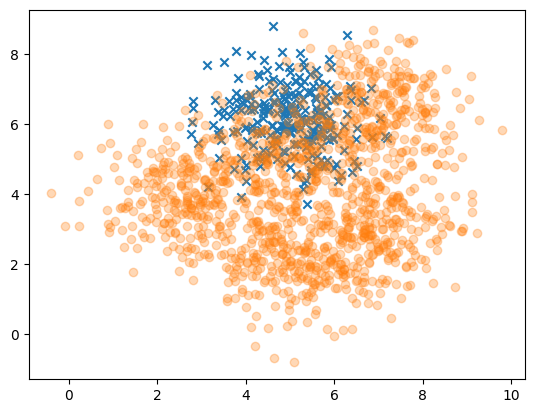

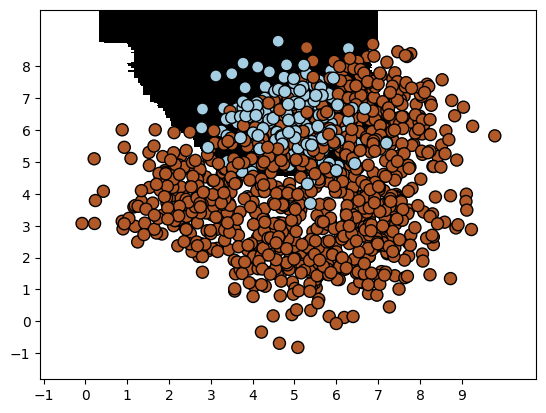

              precision    recall  f1-score   support

     class_0       0.46      0.92      0.61       206
     class_1       0.98      0.77      0.86       994

    accuracy                           0.80      1200
   macro avg       0.72      0.85      0.74      1200
weighted avg       0.89      0.80      0.82      1200

              precision    recall  f1-score   support

     class_0       0.40      0.89      0.55        44
     class_1       0.98      0.77      0.86       256

    accuracy                           0.79       300
   macro avg       0.69      0.83      0.71       300
weighted avg       0.89      0.79      0.82       300



In [14]:
classReport(x,y)

In [15]:
# 언더샘플링
# 다수 클래스의 샘플을 무작위로 제거해서 균형을 맞춤
len(class_0), len(class_1)

(250, 1250)

In [16]:
from imblearn.under_sampling import RandomUnderSampler
undersampler =  RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(x,y)
len(y),np.unique( y_resampled, return_counts=True)

(1500, (array([0., 1.]), array([250, 250])))

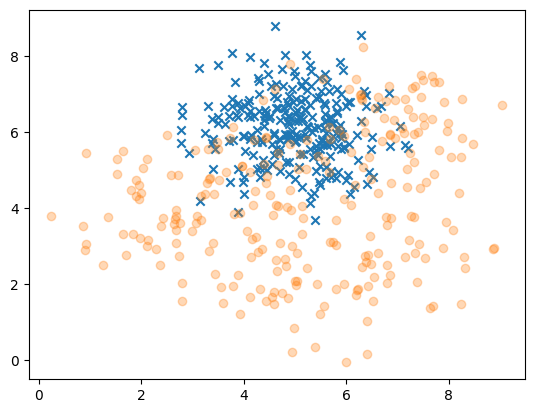

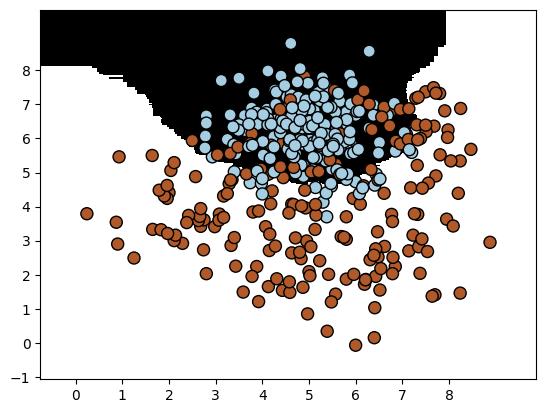

              precision    recall  f1-score   support

     class_0       0.82      0.91      0.87       204
     class_1       0.90      0.80      0.84       196

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400

              precision    recall  f1-score   support

     class_0       0.70      0.91      0.79        46
     class_1       0.90      0.67      0.77        54

    accuracy                           0.78       100
   macro avg       0.80      0.79      0.78       100
weighted avg       0.81      0.78      0.78       100



In [17]:
classReport(X_resampled,y_resampled)

In [18]:
np.unique(y_resampled, return_counts=True)

(array([0., 1.]), array([250, 250]))

In [20]:
from imblearn.over_sampling import RandomOverSampler
oversampler =  RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x,y)
len(y),np.unique( y_resampled, return_counts=True)

(1500, (array([0., 1.]), array([1250, 1250])))

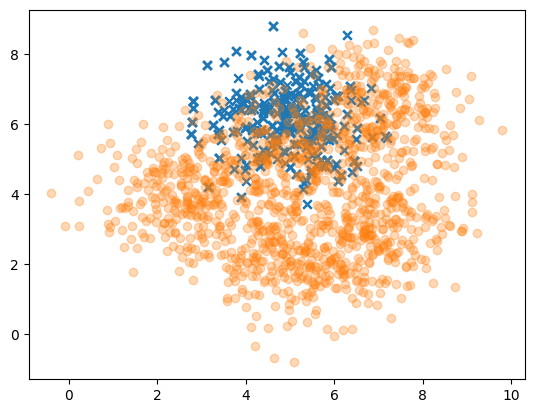

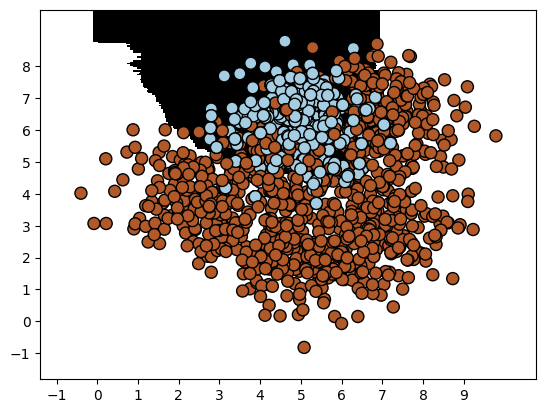

              precision    recall  f1-score   support

     class_0       0.80      0.93      0.86      1003
     class_1       0.91      0.77      0.84       997

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

              precision    recall  f1-score   support

     class_0       0.78      0.88      0.83       247
     class_1       0.87      0.76      0.81       253

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



In [21]:
classReport(x_resampled,y_resampled)

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x,y)
len(y), np.unique(y_resampled, return_counts=True)

(1500, (array([0., 1.]), array([1250, 1250])))

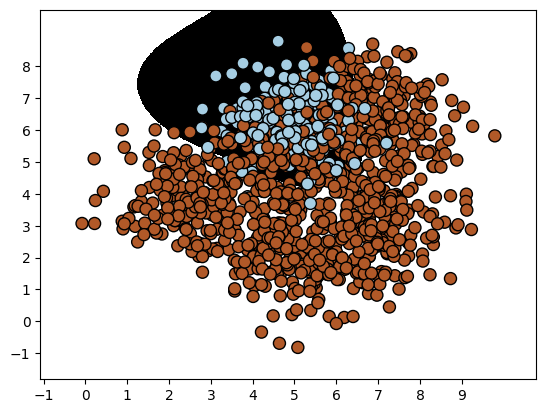

              precision    recall  f1-score   support

     class_0       0.46      0.92      0.61       206
     class_1       0.98      0.77      0.86       994

    accuracy                           0.80      1200
   macro avg       0.72      0.85      0.74      1200
weighted avg       0.89      0.80      0.82      1200

              precision    recall  f1-score   support

     class_0       0.40      0.89      0.55        44
     class_1       0.98      0.77      0.86       256

    accuracy                           0.79       300
   macro avg       0.69      0.83      0.71       300
weighted avg       0.89      0.79      0.82       300



In [23]:
# 머신러닝 모델에 파라메터로 class_weight는 가중치를 조정하는 방식으로 불균형을 조정한다
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
svc = SVC(class_weight='balanced')
svc.fit(x,y)
visualize_classifier(svc, x_train, y_train)
# 분류기 성능 계산
print(classification_report(y_train, classifier.predict(x_train), target_names=['class_0', 'class_1']))
print(classification_report(y_test, classifier.predict(x_test), target_names=['class_0', 'class_1']))

그리드 검색을 통한 최적의 매개변수 찾기 - 하이퍼파라메터 튜닝

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
input_file = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/data_random_forests.txt'

In [26]:
from operator import delitem
data = np.loadtxt(input_file, delimiter=',')
x,y = data[:, :-1], data[:, -1]

In [27]:
np.unique(y, return_counts=True)

(array([0., 1., 2.]), array([300, 300, 300]))

In [28]:
class_0 = np.array(x[y==0])
class_1 = np.array(x[y==1])
class_2 = np.array(x[y==2])

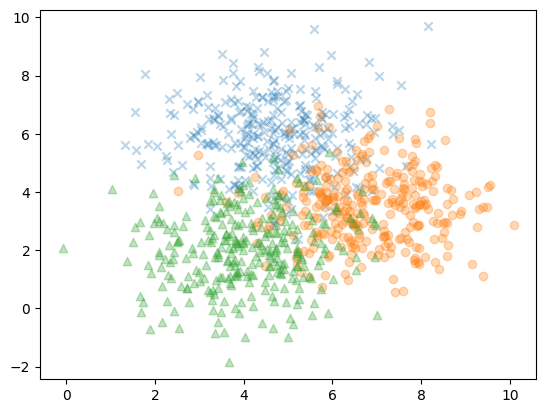

In [29]:
plt.scatter(class_0[:,0], class_0[:,1], marker='x', alpha=0.3)
plt.scatter(class_1[:,0], class_1[:,1], marker='o', alpha=0.3)
plt.scatter(class_2[:,0], class_2[:,1], marker='^', alpha=0.3)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [31]:
params = {
    'n_estimators' : [100, 200, 500, 1000],
    'max_depth' : [3,4,5,10,15]
}
metrics = ['precision_weighted', 'recall_weighted']
for metric in metrics:
  classifier = GridSearchCV(ExtraTreesClassifier(), param_grid=params, cv=5, scoring=metric)
  classifier.fit(x_train, y_train)
  print(f'Best parameters: {classifier.best_params_}')
  # 성능을 출력
  y_pred = classifier.predict(x_test)
  print("performance report:")
  print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 3, 'n_estimators': 1000}
performance report:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        75
         1.0       0.80      0.81      0.80        53
         2.0       0.85      0.85      0.85        52

    accuracy                           0.86       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.86      0.86      0.86       180

Best parameters: {'max_depth': 3, 'n_estimators': 500}
performance report:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        75
         1.0       0.79      0.77      0.78        53
         2.0       0.85      0.85      0.85        52

    accuracy                           0.85       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.85      0.85      0.85       180

